# Importing libraries and loading dataset


In [1]:
# Starting from loading the libraries required for analysis
# This was first done step by step with each model and cell but was combined finally to make the file cleaner and shorter  

!pip install pandas 
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
import matplotlib.dates as mdates

In [2]:
# Load the dataset
file_path = 'Monthly_New.csv'
data = pd.read_csv(file_path)

#first few rows
data.head()

,Year,Month,TotalPrimaryEnergyConsumption,TotalPrimaryEnergyProduction,TotalPrimaryEnergyExports,TotalPrimaryEnergyImports,TotalPrimaryEnergyConsumedbytheIndustrialSector,TotalPrimaryEnergyConsumedbytheResidentialSector,PrimaryEnergyStockChange
0,1973,1,7223.87,5404.72,125.78,1173.08,2027.03,1339.27,771.858
1,1973,2,6592.37,5155.12,120.88,1168.01,1841.30,1174.90,390.129
2,1973,3,6521.44,5419.56,139.95,1309.47,1926.41,983.37,-67.640
3,1973,4,5941.73,5160.81,194.19,1085.17,1914.02,715.39,-110.067
4,1973,5,6071.94,5411.25,196.78,1162.80,2076.47,535.91,-305.335


In [3]:
data.head()
data.info()
data.tail()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 9 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Year                                              600 non-null    int64  
 1   Month                                             600 non-null    int64  
 2   TotalPrimaryEnergyConsumption                     600 non-null    float64
 3   TotalPrimaryEnergyProduction                      600 non-null    float64
 4   TotalPrimaryEnergyExports                         600 non-null    float64
 5   TotalPrimaryEnergyImports                         600 non-null    float64
 6   TotalPrimaryEnergyConsumedbytheIndustrialSector   600 non-null    float64
 7   TotalPrimaryEnergyConsumedbytheResidentialSector  600 non-null    float64
 8   PrimaryEnergyStockChange                          600 non-null    float64
dtypes: float64(7), int64(2

,Year,Month,TotalPrimaryEnergyConsumption,TotalPrimaryEnergyProduction,TotalPrimaryEnergyExports,TotalPrimaryEnergyImports,TotalPrimaryEnergyConsumedbytheIndustrialSector,TotalPrimaryEnergyConsumedbytheResidentialSector,PrimaryEnergyStockChange
count,600.00000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,1997.50000,6.500000,7443.648367,6151.945150,614.810550,1873.345233,1806.877217,584.944550,33.168808
std,14.44291,3.454933,948.023811,900.046445,549.351969,560.824520,146.841942,321.885502,477.767649
min,1973.00000,1.000000,5435.630000,4306.800000,56.800000,710.560000,1466.350000,192.330000,-894.627000
25%,1985.00000,3.750000,6659.732500,5590.352500,310.907500,1449.070000,1712.015000,301.325000,-326.697750
50%,1997.50000,6.500000,7617.660000,5906.840000,373.645000,1848.500000,1808.625000,484.745000,-80.120000
75%,2010.00000,9.250000,8112.430000,6296.127500,683.970000,2278.337500,1895.445000,874.320000,327.448000
max,2022.00000,12.000000,9664.300000,8813.290000,2427.220000,3149.640000,2267.320000,1488.040000,1551.345000


In [4]:
# Creating a unique identifier for each year (sequence from 1 to 74) - To use it as a feature while building models
# Combining 'Year' and 'Month' columns into a new 'Date' column which displays time-series format
data['Date'] = pd.to_datetime(data['Year'].astype(str) + '-' + data['Month'].astype(str), format='%Y-%m')

data['t'] = range(1, len(data) + 1)

print(data.head())
data.info()

   Year  Month  TotalPrimaryEnergyConsumption  TotalPrimaryEnergyProduction  \
0  1973      1                        7223.87                       5404.72   
1  1973      2                        6592.37                       5155.12   
2  1973      3                        6521.44                       5419.56   
3  1973      4                        5941.73                       5160.81   
4  1973      5                        6071.94                       5411.25   

   TotalPrimaryEnergyExports  TotalPrimaryEnergyImports  \
0                     125.78                    1173.08   
1                     120.88                    1168.01   
2                     139.95                    1309.47   
3                     194.19                    1085.17   
4                     196.78                    1162.80   

   TotalPrimaryEnergyConsumedbytheIndustrialSector  \
0                                          2027.03   
1                                          1841.30   
2       

# Seasonal decomposition to plot ARIMA model by obtaining p, d, and q values


In [5]:
# Converting Date column datetime format, convert it
data['Date'] = pd.to_datetime(data['Date'])

# Setting 'Date' as the index
data.set_index('Date', inplace=True)

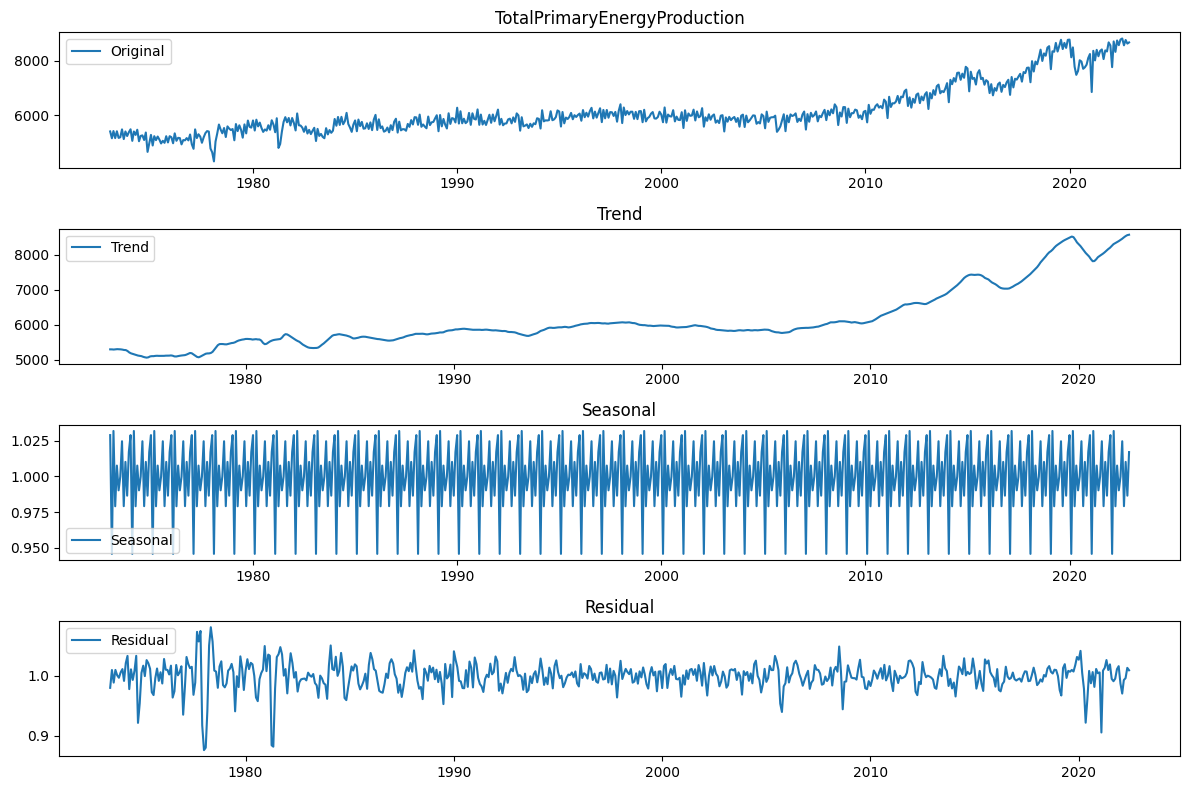

In [6]:
# Performing time series decomposition
decomposition = sm.tsa.seasonal_decompose(data['TotalPrimaryEnergyProduction'], model='multiplicative')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plotting the original time series data
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(data['TotalPrimaryEnergyProduction'], label='Original')
plt.legend(loc='best')
plt.title('TotalPrimaryEnergyProduction')

# Plotting the trend component
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.title('Trend')

# Plotting the seasonal component
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')
plt.title('Seasonal')

# Plotting the residual component
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')
plt.title('Residual')

plt.tight_layout()
plt.show()


**Analysis**

- Original Plot displays the real values of Total Primary Energy Production measured annually.
- Trend Plot indicates a gradual increase in energy production, noticeable every 10 years, suggesting a long-term growth pattern.
- Seasonality plot captures regular patterns over the years, revealing the presence of seasonality in the Total Primary Energy Production dataset.
- Residual plot represents the remaining noise in the data after removing both seasonality and trends. It reflects unexplained variability in the dataset, highlighting factors not accounted for by identified patterns and trends.

# Conducting ADF test to check if the data is stationary. If not, making it stationary for fitting an ARIMA model.


In [7]:
# Defining target variables for production and consumption
y_production = data['TotalPrimaryEnergyProduction']
y_consumption = data['TotalPrimaryEnergyConsumption']

# Performing ADF test for production data
adf_result_production = adfuller(y_production)
adf_statistic_production = adf_result_production[0]
adf_pvalue_production = adf_result_production[1]

# Performing ADF test for consumption data
adf_result_consumption = adfuller(y_consumption)
adf_statistic_consumption = adf_result_consumption[0]
adf_pvalue_consumption = adf_result_consumption[1]

# Printing ADF test results for production data
print("ADF Test Results for Production Data:")
print(f"ADF Statistic: {adf_statistic_production:.2f}")
print(f"P-value: {adf_pvalue_production:.5f}")

# Checking ADF test results for production data
if adf_pvalue_production < 0.05:
    print("Production data is stationary (p-value < 0.05)")
else:
    print("Production data is not stationary (p-value >= 0.05)")

# Printing ADF test results for consumption data
print("\nADF Test Results for Consumption Data:")
print(f"ADF Statistic: {adf_statistic_consumption:.2f}")
print(f"P-value: {adf_pvalue_consumption:.5f}")

# Checking ADF test results for consumption data
if adf_pvalue_consumption < 0.05:
    print("Consumption data is stationary (p-value < 0.05)")
else:
    print("Consumption data is not stationary (p-value >= 0.05)")


ADF Test Results for Production Data:
ADF Statistic: 0.77
P-value: 0.99106
Production data is not stationary (p-value >= 0.05)

ADF Test Results for Consumption Data:
ADF Statistic: -1.31
P-value: 0.62405
Consumption data is not stationary (p-value >= 0.05)


**Analysis**:

- The ADF test for Total Primary Energy Production yields a positive result, and the p-value is greater than 0.05, indicating that the data is not stationary.

- Similarly, the ADF test for Total Primary Energy Consumption gives a negative result, and the p-value is greater than 0.05, suggesting that the data is not stationary at the chosen significance level.


# Applying differencing (integration) to achieve stationarity.


In [8]:
# Deseasonalizing time series
deseasonalized_series = data['TotalPrimaryEnergyProduction'] - seasonal

# Performing ADF test on the deseasonalized series with initial differencing (d=0)
adf_result_deseasonalized = adfuller(deseasonalized_series)
adf_pvalue_deseasonalized = adf_result_deseasonalized[1]

# Checking ADF test results for the deseasonalized data with initial differencing
if adf_pvalue_deseasonalized < 0.05:
    print("Deseasonalized data is stationary with initial differencing (d=0).")
else:
    
    d = 1  
    deseasonalized_diff = deseasonalized_series.diff(periods=d).dropna()
    adf_result_diff = adfuller(deseasonalized_diff)
    adf_pvalue_diff = adf_result_diff[1]

    if adf_pvalue_diff < 0.05:
        print(f"Deseasonalized data is stationary with differencing (d={d}).")
    else:
        print(f"Deseasonalized data is still not stationary with differencing (d={d}). May need further differencing.")


Deseasonalized data is stationary with differencing (d=1).


# ACF and PACF plots for differenced data to calculate the p, d, and q values for ARIMA model


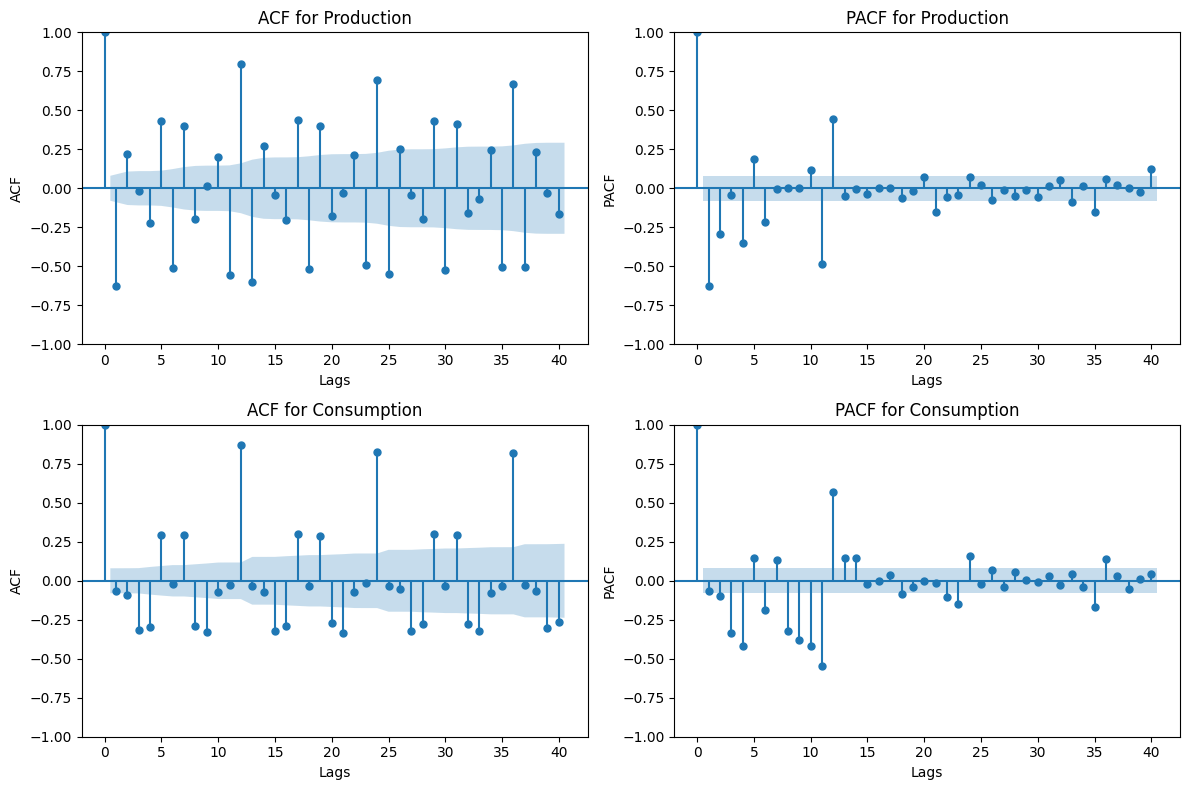

In [9]:
# Creating ACF and PACF plots for production and consumption
plt.figure(figsize=(12, 8))

# ACF and PACF for production
plt.subplot(221)
plot_acf(data['TotalPrimaryEnergyProduction'].diff().dropna(), lags=40, ax=plt.gca())  
plt.title('ACF for Production')
plt.xlabel('Lags')
plt.ylabel('ACF')

plt.subplot(222)
plot_pacf(data['TotalPrimaryEnergyProduction'].diff().dropna(), lags=40, ax=plt.gca())  
plt.title('PACF for Production')
plt.xlabel('Lags')
plt.ylabel('PACF')

# ACF and PACF for consumption
plt.subplot(223)
plot_acf(data['TotalPrimaryEnergyConsumption'].diff().dropna(), lags=40, ax=plt.gca())  
plt.title('ACF for Consumption')
plt.xlabel('Lags')
plt.ylabel('ACF')

plt.subplot(224)
plot_pacf(data['TotalPrimaryEnergyConsumption'].diff().dropna(), lags=40, ax=plt.gca())  
plt.title('PACF for Consumption')
plt.xlabel('Lags')
plt.ylabel('PACF')

plt.tight_layout()
plt.show()


**Analysis**:
- The ACF and PACF plots for the differenced series provide insights into defining the d, p, and q values for the ARIMA model.

- Autocorrelation in the ACF plot starts slightly positive in the first lag, turns negative in the second, and rises again, reaching 0 in the 13th lag. This suggests a need for at least one differencing (d=1) to achieve stationarity.

- If d=1 doesn't yield satisfactory results, further exploration with d=0, 2, 3, etc., will be considered.

- The ACF plot becoming negative in the second lag implies a potential autoregressive (AR) order of 1 (p=1). The negative ACF value at lag 2 indicates the presence of a first-order autoregressive term.

- Since ACF values decline after the first lag, it suggests a moving average (MA) order of 0 (q=0), indicating a possible need for a zero-order moving average term.

- Notably, the ACF values rise again after the second lag and gradually come to zero at the 13th lag. Considering this, trying q=1 will be explored to evaluate its impact on accuracy.

- The above analysis holds true for both Production and Consumption plots.

# ARIMA Model to Forecast Total Primary Energy Production and Consumption


In [10]:
# Defining features for production and consumption
features_production = ['t', 'TotalPrimaryEnergyConsumption', 'TotalPrimaryEnergyExports',
            'TotalPrimaryEnergyImports']


features_consumption = ['t', 'TotalPrimaryEnergyProduction', 'TotalPrimaryEnergyExports',
            'TotalPrimaryEnergyImports']



# Creating feature matrices for production and consumption
X_production = data[features_production]
X_consumption = data[features_consumption]

# Defining target variables for production and consumption
y_production = data['TotalPrimaryEnergyProduction']
y_consumption = data['TotalPrimaryEnergyConsumption']

# Defining values for p, d, and q based on your data characteristics
p = 0 
d = 0  
q = 1

# Sorting the DataFrame by the index (Year)
data = data.sort_index()

# Splitting  data into training and test sets
train_start, train_end = '1973-01-01', '2017-01-01'
test_start, test_end = '2018-01-01', '2022-01-01'

train_data = data[train_start:train_end]
test_data = data[test_start:test_end]

# Fitting an ARIMA model to the training data for production
model_production = sm.tsa.ARIMA(y_production[train_start:train_end], order=(p, d, q), exog=X_production[train_start:train_end])
results_production = model_production.fit()

# Fitting an ARIMA model to the training data for consumption
model_consumption = sm.tsa.ARIMA(y_consumption[train_start:train_end], order=(p, d, q), exog=X_consumption[train_start:train_end])
results_consumption = model_consumption.fit()

# Making predictions on both the training and test data for production
forecast_train_production = results_production.predict(start=train_start, end=train_end, exog=X_production[train_start:train_end])
forecast_test_production = results_production.forecast(steps=len(test_data), exog=X_production[test_start:test_end])

# Making predictions on both the training and test data for consumption
forecast_train_consumption = results_consumption.predict(start=train_start, end=train_end, exog=X_consumption[train_start:train_end])
forecast_test_consumption = results_consumption.forecast(steps=len(test_data), exog=X_consumption[test_start:test_end])

# Accuracy metrics for training set for production
mape_train_production = np.mean(np.abs((y_production[train_start:train_end] - forecast_train_production) / y_production[train_start:train_end])) * 100
rmse_train_production = np.sqrt(mean_squared_error(y_production[train_start:train_end], forecast_train_production))
mse_train_production = mean_squared_error(y_production[train_start:train_end], forecast_train_production)

# Accuracy metrics for test set for production
mape_test_production = np.mean(np.abs((y_production[test_start:test_end] - forecast_test_production) / y_production[test_start:test_end])) * 100
rmse_test_production = np.sqrt(mean_squared_error(y_production[test_start:test_end], forecast_test_production))
mse_test_production = mean_squared_error(y_production[test_start:test_end], forecast_test_production)

# Accuracy metrics for training set for consumption
mape_train_consumption = np.mean(np.abs((y_consumption[train_start:train_end] - forecast_train_consumption) / y_consumption[train_start:train_end])) * 100
rmse_train_consumption = np.sqrt(mean_squared_error(y_consumption[train_start:train_end], forecast_train_consumption))
mse_train_consumption = mean_squared_error(y_consumption[train_start:train_end], forecast_train_consumption)

# Accuracy metrics for test set for consumption
mape_test_consumption = np.mean(np.abs((y_consumption[test_start:test_end] - forecast_test_consumption) / y_consumption[test_start:test_end])) * 100
rmse_test_consumption = np.sqrt(mean_squared_error(y_consumption[test_start:test_end], forecast_test_consumption))
mse_test_consumption = mean_squared_error(y_consumption[test_start:test_end], forecast_test_consumption)

# Accuracy for training set for production
model_accuracy_train_production = 100 - mape_train_production

#Accuracy for test set for production
model_accuracy_test_production = 100 - mape_test_production

# Accuracy for training set for consumption
model_accuracy_train_consumption = 100 - mape_train_consumption

# Accuracy for test set for consumption
model_accuracy_test_consumption = 100 - mape_test_consumption

print("Production Forecast Results:")
print(f'Training Set MAPE: {mape_train_production:.2f}%')
print(f'Test Set MAPE: {mape_test_production:.2f}%')
print(f'Training Set RMSE: {rmse_train_production:.2f}')
print(f'Test Set RMSE: {rmse_test_production:.2f}')
print(f'Training Set MSE: {mse_train_production:.2f}')
print(f'Test Set MSE: {mse_test_production:.2f}')
print(f'Training Set Model Accuracy: {model_accuracy_train_production:.2f}%')
print(f'Test Set Model Accuracy: {model_accuracy_test_production:.2f}')

print("\nConsumption Forecast Results:")
print(f'Training Set MAPE: {mape_train_consumption:.2f}%')
print(f'Test Set MAPE: {mape_test_consumption:.2f}%')
print(f'Training Set RMSE: {rmse_train_consumption:.2f}')
print(f'Test Set RMSE: {rmse_test_consumption:.2f}')
print(f'Training Set MSE: {mse_train_consumption:.2f}')
print(f'Test Set MSE: {mse_test_consumption:.2f}')
print(f'Training Set Model Accuracy: {model_accuracy_train_consumption:.2f}%')
print(f'Test Set Model Accuracy: {model_accuracy_test_consumption:.2f}')


C:\Users\student\anaconda3\envs\mytf\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\student\anaconda3\envs\mytf\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\student\anaconda3\envs\mytf\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\student\anaconda3\envs\mytf\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\student\anaconda3\envs\mytf\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency informa

Production Forecast Results:
Training Set MAPE: 2.69%
Test Set MAPE: 7.62%
Training Set RMSE: 203.55
Test Set RMSE: 367.78
Training Set MSE: 41432.74
Test Set MSE: 135260.06
Training Set Model Accuracy: 97.31%
Test Set Model Accuracy: 92.38

Consumption Forecast Results:
Training Set MAPE: 3.52%
Test Set MAPE: 8.50%
Training Set RMSE: 337.58
Test Set RMSE: 710.04
Training Set MSE: 113957.92
Test Set MSE: 504154.94
Training Set Model Accuracy: 96.48%
Test Set Model Accuracy: 91.50


In [11]:
# AIC and BIC for production
aic_production = results_production.aic
bic_production = results_production.bic

# AIC and BIC for consumption
aic_consumption = results_consumption.aic
bic_consumption = results_consumption.bic

# Printing the AIC and BIC values for production and consumption
print("Production AIC:", aic_production)
print("Production BIC:", bic_production)
print("Consumption AIC:", aic_consumption)
print("Consumption BIC:", bic_consumption)


Production AIC: 7140.453605317845
Production BIC: 7170.350524340854
Consumption AIC: 7673.076080845981
Consumption BIC: 7702.972999868989


**Analysis**:

- The choice of p, d, q values as 0, 0, 1 consistently resulted in the lowest error rates for both Total Primary Energy Production and Consumption forecastsroduction forecasts.


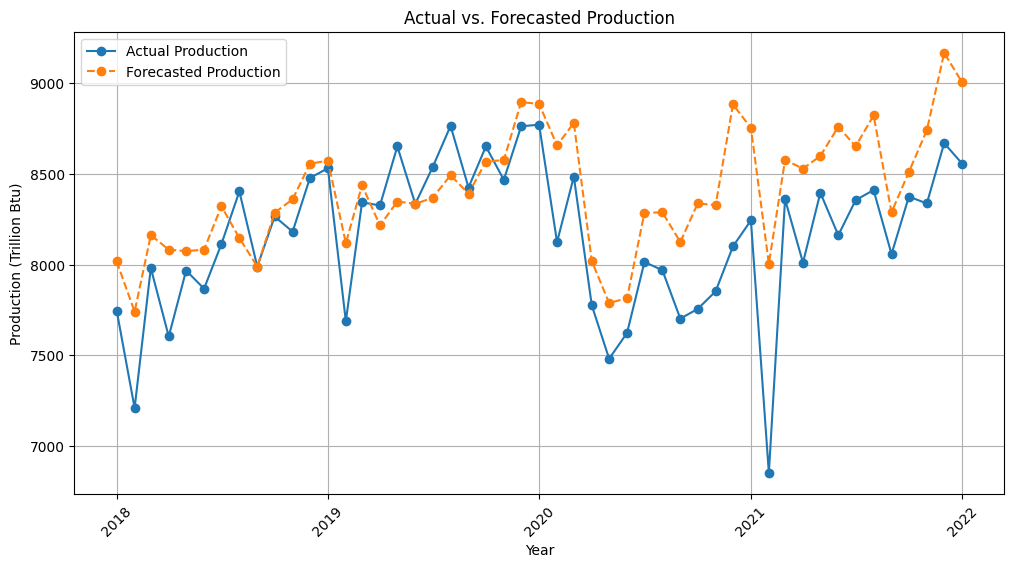

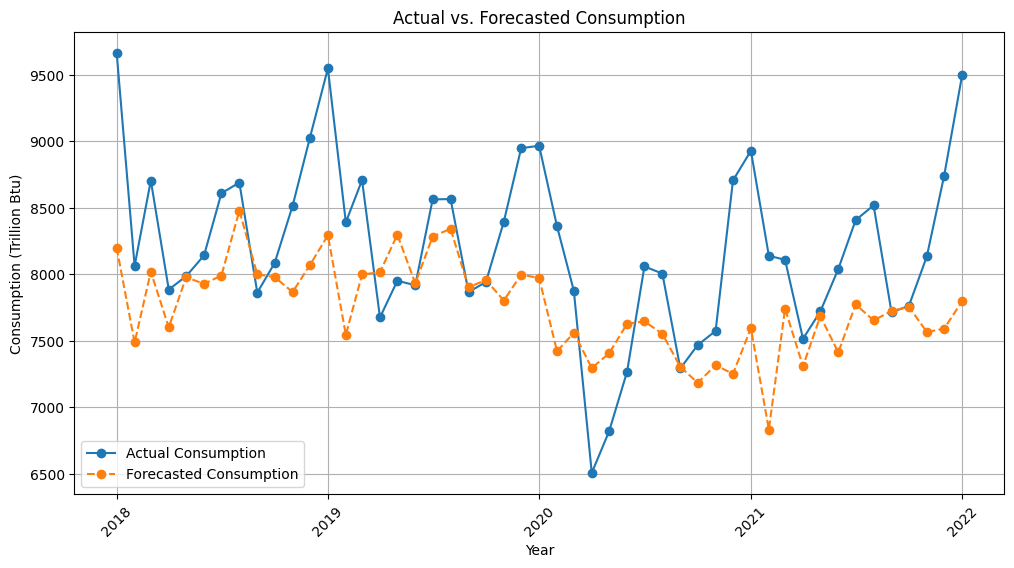

In [12]:
# Plotting actual and forecasted production
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, y_production[test_start:test_end], label='Actual Production', marker='o')
plt.plot(test_data.index, forecast_test_production, label='Forecasted Production', linestyle='--', marker='o')
plt.title('Actual vs. Forecasted Production')
plt.xlabel('Year')
plt.ylabel('Production (Trillion Btu)')
plt.legend()
plt.grid(True)

# Setting x-axis locator and formatter for better date display
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(base=1)) 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  

plt.xticks(rotation=45)  

plt.show()

# Plotting actual and forecasted consumption
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, y_consumption[test_start:test_end], label='Actual Consumption', marker='o')
plt.plot(test_data.index, forecast_test_consumption, label='Forecasted Consumption', linestyle='--', marker='o')
plt.title('Actual vs. Forecasted Consumption')
plt.xlabel('Year')
plt.ylabel('Consumption (Trillion Btu)')
plt.legend()
plt.grid(True)

# Setting x-axis locator and formatter for better date display
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(base=1))  
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  

plt.xticks(rotation=45)  

plt.show()


**Analysis**:

- The comparison between actual and forecast plots for both production and consumption reveals satisfactory results, with lower errors indicating a decent model fit.
- However, there is a slight presence of overfitting, preventing the plots from achieving 100% accuracy.


# SARIMA Model to Forecast Total Primary Energy Production and Consumption


In [13]:
# Defining features for production and consumption
features_production = ['t', 'TotalPrimaryEnergyConsumption', 'TotalPrimaryEnergyExports',
            'TotalPrimaryEnergyImports']

features_consumption = ['t', 'TotalPrimaryEnergyProduction', 'TotalPrimaryEnergyExports',
            'TotalPrimaryEnergyImports']

# Creating feature matrices for production and consumption
X_production = data[features_production]
X_consumption = data[features_consumption]

# Defining target variables for production and consumption
y_production = data['TotalPrimaryEnergyProduction']
y_consumption = data['TotalPrimaryEnergyConsumption']

# Defining values for p, d, and q based on data characteristics
p = 0
d = 0
q = 1

# Defining values for seasonal order (P, D, Q, s)
P = 1
D = 0
Q = 0
s = 12  # Since data is monthly 

# Sorting the DataFrame by the index (Year)
data = data.sort_index()

# Splitting data into training and test sets
# Assuming 1973-2017 as training and 2018-2022 as test
train_start, train_end = '1973-01-01', '2017-01-01'
test_start, test_end = '2018-01-01', '2022-01-01'

train_data = data[train_start:train_end]
test_data = data[test_start:test_end]

# SARIMA model to the training data for production
sarima_model_production = sm.tsa.SARIMAX(y_production[train_start:train_end],
                                         order=(p, d, q),
                                         seasonal_order=(P, D, Q, s),
                                         exog=X_production[train_start:train_end])
sarima_results_production = sarima_model_production.fit()

# SARIMA model to the training data for consumption
sarima_model_consumption = sm.tsa.SARIMAX(y_consumption[train_start:train_end],
                                          order=(p, d, q),
                                          seasonal_order=(P, D, Q, s),
                                          exog=X_consumption[train_start:train_end])
sarima_results_consumption = sarima_model_consumption.fit()

# Making predictions on both the training and test data for production
sarima_forecast_train_production = sarima_results_production.predict(start=train_start, end=train_end,
                                                                     exog=X_production[train_start:train_end])
sarima_forecast_test_production = sarima_results_production.forecast(steps=len(test_data),
                                                                    exog=X_production[test_start:test_end])

# Making predictions on both the training and test data for consumption
sarima_forecast_train_consumption = sarima_results_consumption.predict(start=train_start, end=train_end,
                                                                       exog=X_consumption[train_start:train_end])
sarima_forecast_test_consumption = sarima_results_consumption.forecast(steps=len(test_data),
                                                                      exog=X_consumption[test_start:test_end])

# Accuracy metrics for training set for production
sarima_mape_train_production = np.mean(np.abs((y_production[train_start:train_end] - sarima_forecast_train_production) / y_production[train_start:train_end])) * 100
sarima_rmse_train_production = np.sqrt(mean_squared_error(y_production[train_start:train_end], sarima_forecast_train_production))
sarima_mse_train_production = mean_squared_error(y_production[train_start:train_end], sarima_forecast_train_production)

# Accuracy metrics for test set for production
sarima_mape_test_production = np.mean(np.abs((y_production[test_start:test_end] - sarima_forecast_test_production) / y_production[test_start:test_end])) * 100
sarima_rmse_test_production = np.sqrt(mean_squared_error(y_production[test_start:test_end], sarima_forecast_test_production))
sarima_mse_test_production = mean_squared_error(y_production[test_start:test_end], sarima_forecast_test_production)

# Accuracy metrics for training set for consumption
sarima_mape_train_consumption = np.mean(np.abs((y_consumption[train_start:train_end] - sarima_forecast_train_consumption) / y_consumption[train_start:train_end])) * 100
sarima_rmse_train_consumption = np.sqrt(mean_squared_error(y_consumption[train_start:train_end], sarima_forecast_train_consumption))
sarima_mse_train_consumption = mean_squared_error(y_consumption[train_start:train_end], sarima_forecast_train_consumption)

# Accuracy metrics for test set for consumption
sarima_mape_test_consumption = np.mean(np.abs((y_consumption[test_start:test_end] - sarima_forecast_test_consumption) / y_consumption[test_start:test_end])) * 100
sarima_rmse_test_consumption = np.sqrt(mean_squared_error(y_consumption[test_start:test_end], sarima_forecast_test_consumption))
sarima_mse_test_consumption = mean_squared_error(y_consumption[test_start:test_end], sarima_forecast_test_consumption)

# Accuracy for training set for production
sarima_model_accuracy_train_production = 100 - sarima_mape_train_production

# Accuracy for test set for production
sarima_model_accuracy_test_production = 100 - sarima_mape_test_production

# Accuracy for training set for consumption
sarima_model_accuracy_train_consumption = 100 - sarima_mape_train_consumption

# Accuracy for test set for consumption
sarima_model_accuracy_test_consumption = 100 - sarima_mape_test_consumption

print("SARIMA Production Forecast Results:")
print(f'Training Set MAPE: {sarima_mape_train_production:.2f}%')
print(f'Test Set MAPE: {sarima_mape_test_production:.2f}%')
print(f'Training Set RMSE: {sarima_rmse_train_production:.2f}')
print(f'Test Set RMSE: {sarima_rmse_test_production:.2f}')
print(f'Training Set MSE: {sarima_mse_train_production:.2f}')
print(f'Test Set MSE: {sarima_mse_test_production:.2f}')
print(f'Training Set Model Accuracy: {sarima_model_accuracy_train_production:.2f}%')
print(f'Test Set Model Accuracy: {sarima_model_accuracy_test_production:.2f}')

print("\nSARIMA Consumption Forecast Results:")
print(f'Training Set MAPE: {sarima_mape_train_consumption:.2f}%')
print(f'Test Set MAPE: {sarima_mape_test_consumption:.2f}%')
print(f'Training Set RMSE: {sarima_rmse_train_consumption:.2f}')
print(f'Test Set RMSE: {sarima_rmse_test_consumption:.2f}')
print(f'Training Set MSE: {sarima_mse_train_consumption:.2f}')
print(f'Test Set MSE: {sarima_mse_test_consumption:.2f}')
print(f'Training Set Model Accuracy: {sarima_model_accuracy_train_consumption:.2f}%')
print(f'Test Set Model Accuracy: {sarima_model_accuracy_test_consumption:.2f}')


C:\Users\student\anaconda3\envs\mytf\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\student\anaconda3\envs\mytf\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\student\anaconda3\envs\mytf\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\student\anaconda3\envs\mytf\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\student\anaconda3\envs\mytf\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: N

SARIMA Production Forecast Results:
Training Set MAPE: 3.26%
Test Set MAPE: 5.81%
Training Set RMSE: 435.33
Test Set RMSE: 521.64
Training Set MSE: 189512.97
Test Set MSE: 272112.74
Training Set Model Accuracy: 96.74%
Test Set Model Accuracy: 94.19

SARIMA Consumption Forecast Results:
Training Set MAPE: 3.18%
Test Set MAPE: 4.40%
Training Set RMSE: 517.16
Test Set RMSE: 611.89
Training Set MSE: 267455.20
Test Set MSE: 374408.55
Training Set Model Accuracy: 96.82%
Test Set Model Accuracy: 95.60


**Analysis**:

- The choice of p, d, q values as 0, 0, 1 and P, D ,Q, S values as 1, 0, 0, 12 consistently resulted in the lowest error rates for both Total Primary Energy Production and Consumption forecasts.

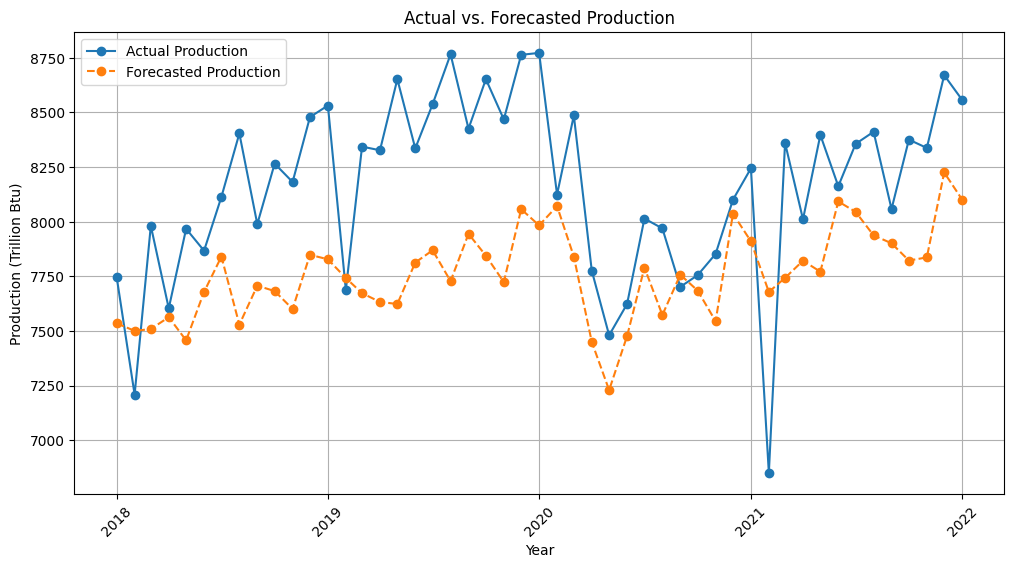

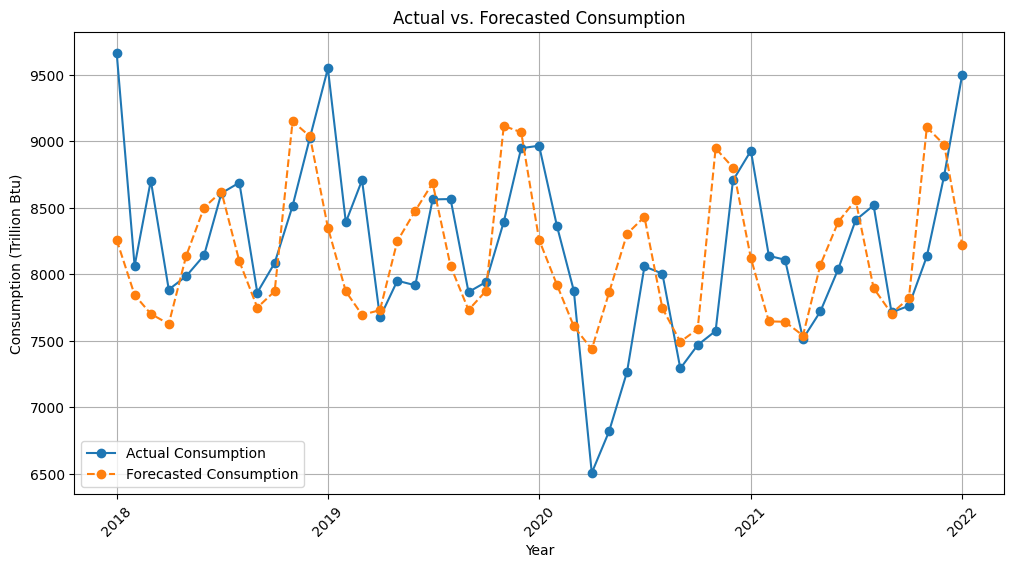

In [14]:
# Plotting actual and forecasted production
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, y_production[test_start:test_end], label='Actual Production', marker='o')
plt.plot(test_data.index, sarima_forecast_test_production, label='Forecasted Production', linestyle='--', marker='o')
plt.title('Actual vs. Forecasted Production')
plt.xlabel('Year')
plt.ylabel('Production (Trillion Btu)')
plt.legend()
plt.grid(True)

# Setting x-axis locator and formatter for better date display
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(base=1))  
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  

plt.xticks(rotation=45)  

plt.show()

# Plotting actual and forecasted consumption
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, y_consumption[test_start:test_end], label='Actual Consumption', marker='o')
plt.plot(test_data.index, sarima_forecast_test_consumption, label='Forecasted Consumption', linestyle='--', marker='o')
plt.title('Actual vs. Forecasted Consumption')
plt.xlabel('Year')
plt.ylabel('Consumption (Trillion Btu)')
plt.legend()
plt.grid(True)

# Setting x-axis locator and formatter for better date display
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(base=1))  
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  

plt.xticks(rotation=45) 

plt.show()


**Analysis**:

- The alignment between the actual and forecast plots for production is not very precise, indicating overfitting, even though the error rate is low.
- In contrast, for consumption, the forecast values align well with the actual values, showcasing both low error rates and minimal overfitting.
